# Detección de anomalías y técnicas de agrupamiento

In [149]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [150]:
df = pd.read_csv("CTG.csv")
df.head()
# df.tail()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


### 1. Análisis descriptivo de los datos

In [151]:
df.nunique()

FileName     352
Date          48
SegFile     2126
b            979
e           1064
LBE           48
LB            48
AC            22
FM            96
UC            19
ASTV          75
MSTV          57
ALTV          87
MLTV         249
DL            15
DS             2
DP             5
DR             1
Width        154
Min          109
Max           86
Nmax          18
Nzeros         9
Mode          88
Mean         103
Median        95
Variance     133
Tendency       3
A              2
B              2
C              2
D              2
E              2
AD             2
DE             2
LD             2
FS             2
SUSP           2
CLASS         10
NSP            3
dtype: int64

#### 1.1. De las variables numéricas, hallar datos estadísticos.

In [152]:
num =  df[['b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC',
        'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR','Width', 'Min',
        'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance']]
cat = df[[
        'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP',
        'CLASS', 'NSP']]

In [153]:
df.shape, num.shape, cat.shape

((2129, 40), (2129, 24), (2129, 13))

In [154]:
num.columns

Index(['b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV',
       'DL', 'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode',
       'Mean', 'Median', 'Variance'],
      dtype='object')

In [155]:
num.describe()

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,DR,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000,...,2128.0,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,878.439793,1702.877234,133.303857,133.303857,2.722484,7.503056,3.669017,47.008933,1.335449,9.884814,...,0.0,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090
std,894.084748,930.919143,9.840844,9.840844,3.560850,39.030452,2.877148,17.210648,0.891543,18.476534,...,0.0,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636
min,0.000000,287.000000,106.000000,106.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,0.0,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000
25%,55.000000,1009.000000,126.000000,126.000000,0.000000,0.000000,1.000000,32.000000,0.700000,0.000000,...,0.0,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000
50%,538.000000,1241.000000,133.000000,133.000000,1.000000,0.000000,3.000000,49.000000,1.200000,0.000000,...,0.0,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000
75%,1521.000000,2434.750000,140.000000,140.000000,4.000000,2.000000,5.000000,61.000000,1.700000,11.000000,...,0.0,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000
max,3296.000000,3599.000000,160.000000,160.000000,26.000000,564.000000,23.000000,87.000000,7.000000,91.000000,...,0.0,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000


El output de la celda superior nos muestra un resumen de las variables estadísticas más representativas a la hora de realizar un análisis explotatorio de los datos. Podemos observar como todas las variables contienen 2126 instancias de los cuales desconocemos entre 1, 2 y 3 de los valores de cada categoría. Teniendo en cuenta el tamaño del dataset y el reducido número de valores, optaremos por eliminar estos para garantizar la completitud del set de datos.

En la segunda fila tenemos los valores medios de cada una de las variables.

En la tercera podemos ver la desviación estándar de cada feature, siendo de suma importancia.

Tenemos dos filas con los valores más grandes y más pequeños de cada feature, mostrándonos del rango de valores de cada una.

También tenemos los cuartiles de la variable que nos puede informar en que rango se mantienen los valores de cada variable. 

#### 1.2. De las variables categóricas, listar las diferentes categorías y hallar la frecuencia de cada una de ellas

In [156]:
# cat.value_counts()

In [157]:
for i in cat.columns:
    print("-----{}-----".format(i))
    print(cat[i].value_counts())

-----Tendency-----
 0.0    1115
 1.0     846
-1.0     165
Name: Tendency, dtype: int64
-----A-----
0.0    1742
1.0     384
Name: A, dtype: int64
-----B-----
0.0    1547
1.0     579
Name: B, dtype: int64
-----C-----
0.0    2073
1.0      53
Name: C, dtype: int64
-----D-----
0.0    2045
1.0      81
Name: D, dtype: int64
-----E-----
0.0    2054
1.0      72
Name: E, dtype: int64
-----AD-----
0.0    1794
1.0     332
Name: AD, dtype: int64
-----DE-----
0.0    1874
1.0     252
Name: DE, dtype: int64
-----LD-----
0.0    2019
1.0     107
Name: LD, dtype: int64
-----FS-----
0.0    2057
1.0      69
Name: FS, dtype: int64
-----SUSP-----
0.0    1929
1.0     197
Name: SUSP, dtype: int64
-----CLASS-----
2.0     579
1.0     384
6.0     332
7.0     252
10.0    197
8.0     107
4.0      81
5.0      72
9.0      69
3.0      53
Name: CLASS, dtype: int64
-----NSP-----
1.0    1655
2.0     295
3.0     176
Name: NSP, dtype: int64


#### 1.3. Crear matriz de correlaciones existentes entre las variables numéricas del conjunto de datos, analizar los resultados

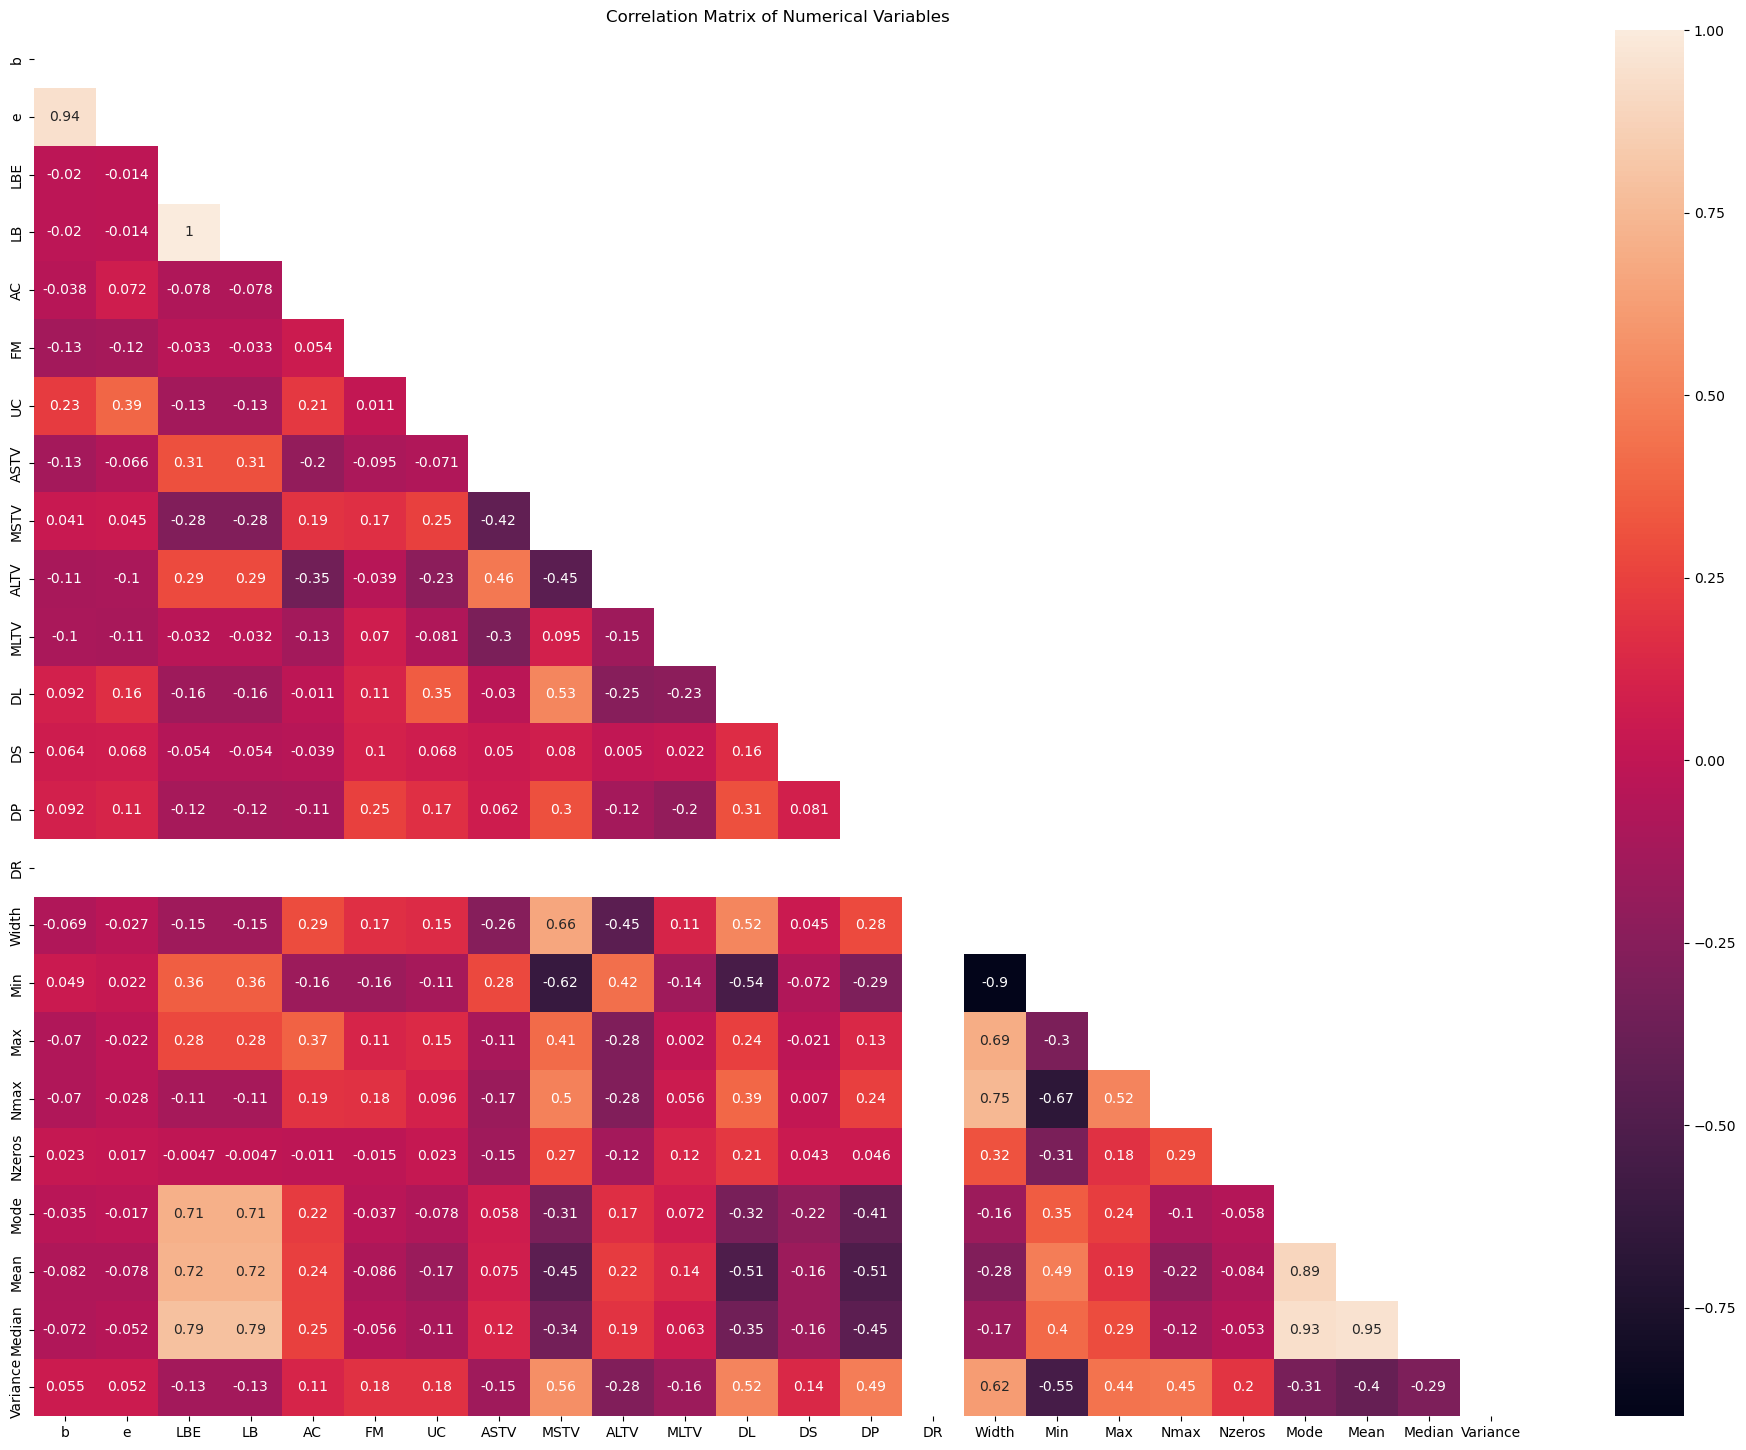

In [158]:
corr_matrix = num.corr()
plt.figure(figsize=(24,18))
sns.heatmap(corr_matrix, annot=True, mask=np.triu(corr_matrix)).set(title="Correlation Matrix of Numerical Variables")
plt.show()

### 2. Tratamiento de missing. Si existen valores faltantes, decidir si eliminar los registros, llenarlos con valores como la media, la mediana o la moda y justifique su respuesta. 

Hay varias estrategias que se pueden aplicar para tratar los valores faltantes en un dataset, dependiendo del tipo y la cantidad de datos faltantes, así como del objetivo del análisis. Algunas de las estrategias comunes incluyen:
+ Eliminación de registros: Si el número de valores faltantes es muy alto, se puede decidir simplemente eliminar los registros que contienen valores faltantes. Esta estrategia es adecuada cuando el número de registros con valores faltantes es muy bajo en relación con el tamaño total del dataset.
+ Imputación de valores: En lugar de eliminar los registros con valores faltantes, se pueden reemplazar los valores faltantes con valores estimados. Hay varios métodos para la imputación de valores, como la media, la mediana, la moda o la imputación basada en modelos estadísticos.
+ Interpolación: Si los valores faltantes están distribuidos de manera no aleatoria a lo largo del dataset, se puede utilizar la interpolación para estimar los valores faltantes. La interpolación es una técnica matemática que se utiliza para estimar valores intermedios a partir de valores conocidos.
+ Análisis con valores faltantes: En algunos casos, es posible realizar el análisis con los valores faltantes en el dataset. Por ejemplo, algunos algoritmos de aprendizaje automático son capaces de manejar valores faltantes sin necesidad de reemplazarlos.

En general, la elección de la estrategia para tratar los valores faltantes depende de la cantidad y distribución de los valores faltantes, así como del objetivo y los requisitos del análisis. Es importante evaluar las diferentes opciones y elegir la estrategia adecuada para garantizar la calidad y la fiabilidad de los resultados del análisis.

In [159]:
df['DR'].unique(), df['DR'].nunique()

(array([ 0., nan]), 1)

Podemos observar cómo la columna DR contiene todo ceros y algún Nan value, por lo que dropearemos esta columna ya que no aporta información relevante.

In [160]:
df.drop(columns=['DR'], axis=1, inplace=True)

La decisión sobre si imputar los valores faltantes con la media o la mediana depende de la distribución de los datos. La media es una buena opción para los datos con una distribución normal o similar a la normal. Por otro lado, la mediana es una mejor opción para los datos con una distribución no normal o con valores atípicos, ya que la mediana es menos sensible a estos valores atípicos que la media.

Sin embargo, ambos métodos tienen sus limitaciones. La imputación con la media puede ser afectada por valores atípicos y la imputación con la mediana no proporciona una estimación continua para los datos. Por lo tanto, es importante evaluar la distribución de los datos y elegir el método de imputación adecuado. En algunos casos, puede ser necesario utilizar una combinación de métodos o una técnica de imputación más sofisticada.
La decisión sobre si imputar los valores faltantes con la media o la mediana depende de la distribución de los datos. La media es una buena opción para los datos con una distribución normal o similar a la normal. Por otro lado, la mediana es una mejor opción para los datos con una distribución no normal o con valores atípicos, ya que la mediana es menos sensible a estos valores atípicos que la media.

Sin embargo, ambos métodos tienen sus limitaciones. La imputación con la media puede ser afectada por valores atípicos y la imputación con la mediana no proporciona una estimación continua para los datos. Por lo tanto, es importante evaluar la distribución de los datos y elegir el método de imputación adecuado. En algunos casos, puede ser necesario utilizar una combinación de métodos o una técnica de imputación más sofisticada.


In [161]:
df.columns

Index(['FileName', 'Date', 'SegFile', 'b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC',
       'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'Width', 'Min', 'Max',
       'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'A',
       'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'NSP'],
      dtype='object')

In [162]:
df[df.isna().any(axis=1)]

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
2126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,564.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Al ser solo 3 instancias respecto del total del dataset, 2126 instancias, hemos decidido que podemos permitirnos eliminarlos.

In [163]:
df.dropna(axis=0,inplace=True)

In [164]:
df.isna().sum()

FileName    0
Date        0
SegFile     0
b           0
e           0
LBE         0
LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 0 to 2125
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FileName  2126 non-null   object 
 1   Date      2126 non-null   object 
 2   SegFile   2126 non-null   object 
 3   b         2126 non-null   float64
 4   e         2126 non-null   float64
 5   LBE       2126 non-null   float64
 6   LB        2126 non-null   float64
 7   AC        2126 non-null   float64
 8   FM        2126 non-null   float64
 9   UC        2126 non-null   float64
 10  ASTV      2126 non-null   float64
 11  MSTV      2126 non-null   float64
 12  ALTV      2126 non-null   float64
 13  MLTV      2126 non-null   float64
 14  DL        2126 non-null   float64
 15  DS        2126 non-null   float64
 16  DP        2126 non-null   float64
 17  Width     2126 non-null   float64
 18  Min       2126 non-null   float64
 19  Max       2126 non-null   float64
 20  Nmax      2126 non-null   floa

### 3. Aplicar una técnica de detección de anomalías y explicar los resultados obtenidos. 

In [166]:
df0 = df.drop(columns=['FileName', 'Date', 'SegFile'])

#### 3.1. Isolation Forest

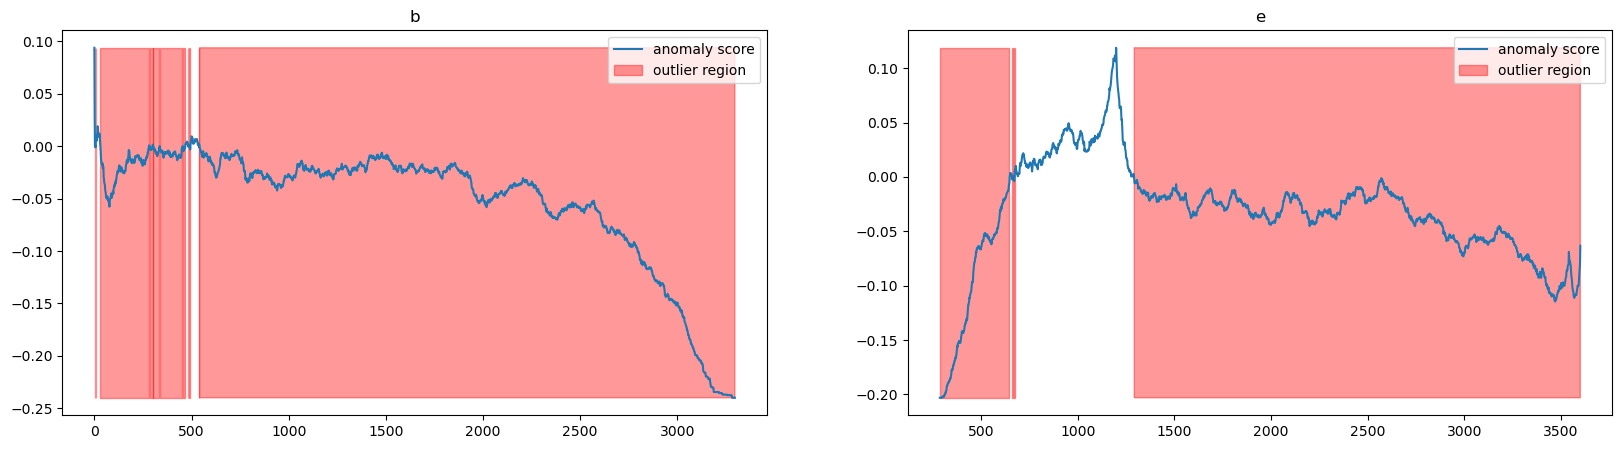

In [238]:
from sklearn.ensemble import IsolationForest

# cols = ['b','e','LBE', 'LB']
cols = ['b','e']
# cols = df0.columns

#Plotting the sub plot
fig, axs = plt.subplots(1, len(cols), figsize=(20, 5), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i, column in enumerate(cols):
    isolation_forest = IsolationForest(contamination='auto')
    isolation_forest.fit(df0[column].values.reshape(-1,1))

    xx = np.linspace(df0[column].min(), df0[column].max(), len(df0)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    df0['anomaly'] = outlier = isolation_forest.predict(xx)
    
    axs[i].plot(xx, anomaly_score, label='anomaly score')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                        where=outlier==-1, color='r', 
                        alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)

Isolation Forest es un algoritmo para la detección de valores atípicos en grandes conjuntos de datos de alta dimensión. Es un método basado en árboles que utiliza particiones aleatorias para aislar muestras individuales en los datos. La idea es que los valores atípicos requerirán menos particiones aleatorias para ser aislados y, por tanto, tendrán trayectorias más cortas desde el nodo raíz del árbol hasta el nodo hoja aislado que representa el valor atípico.
+ El algoritmo comienza seleccionando aleatoriamente una característica y un valor de división aleatorio para esa característica
+ Basándose en el valor de división, los datos se dividen en dos subconjuntos, y el proceso se repite recursivamente en cada subconjunto hasta que los puntos de datos se aíslan en nodos hoja separados.
+ Se calcula la longitud del camino desde el nodo raíz al nodo hoja para cada punto de datos, y estas longitudes de camino se utilizan como puntuaciones de anomalía. Cuanto menor sea la longitud del camino, mayor será la puntuación de la anomalía y más probable será que el punto sea un valor atípico.
+ El algoritmo se repite varias veces para crear un Isolation Forest. A continuación, se calcula la puntuación de anomalía de cada punto de datos como la longitud media de la trayectoria de todos los árboles del bosque.
+ Por último, se aplica un umbral a las puntuaciones de anomalía para determinar qué puntos son atípicos y cuáles no.

Isolation Forest tiene varias ventajas sobre otros algoritmos de detección de valores atípicos. Es eficiente, puede manejar datos de alta dimensión y es menos sensible a la presencia de características ruidosas o irrelevantes en los datos. Además, es fácil de interpretar y aplicar, lo que lo convierte en una opción popular para la detección de valores atípicos.


#### 3.2. Local Outlier Factor Method

In [239]:
# En el dataset de enfermedad cardíaca vamos a observar las variables edad y colesterol
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
X = df0[cols].values
# X = df_1[['age','chol']].values
y_pred = clf.fit_predict(X)

In [240]:
# Inliers tend to have a LOF score close to 1 (negative_outlier_factor_ close to -1), while outliers tend to have a larger LOF score
clf.negative_outlier_factor_

array([-1.86623831, -0.99477807, -1.0621455 , ..., -0.98862555,
       -1.46881218, -1.04552144])

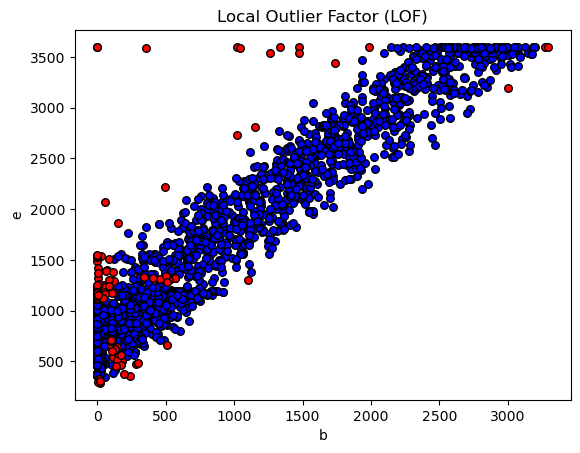

In [241]:
in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.title("Local Outlier Factor (LOF)")

# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30)
plt.axis('tight')
plt.xlabel('b');
plt.ylabel('e');

plt.show()

No se especifica el número de categorías que se deben utilizar en el algoritmo de Local Outlier Factor (LOF), ya que se trata de un método de detección de valores atípicos basado en la densidad. El algoritmo LOF no hace ninguna suposición sobre la distribución de los datos o el número de categorías, y puede utilizarse en datos con cualquier número de dimensiones o características.

En su lugar, el algoritmo LOF calcula la densidad local de cada punto de datos en relación con sus vecinos y utiliza esta información para determinar si un punto concreto es un valor atípico o no. El número de vecinos utilizados para calcular la densidad puede especificarse mediante el parámetro "n_neighbors" del algoritmo LOF.

Así pues, en conclusión, el número de categorías a utilizar en el algoritmo LOF no es un factor determinante, ya que éste opera sobre la densidad de los datos y no sobre las categorías.

### 4. Aplicar una técnica de agrupamiento, explicar la técnica y los resultados obtenidos

In [242]:
from sklearn.preprocessing import MinMaxScaler
def EscaladorMinMax(data, MinMaxtransformer):
    X_normalized = MinMaxtransformer.transform(data)
    X_normalized = pd.DataFrame(X_normalized,columns=data.columns)
    return X_normalized

In [243]:
MinMaxtransformer = MinMaxScaler().fit(df0) # Only run once
# Ahora habría que llamar a la función

In [244]:
df_scaled = EscaladorMinMax(df0, MinMaxtransformer)

In [245]:
df_scaled.head()

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP,anomaly
0,0.072816,0.021135,0.259259,0.259259,0.000000,0.0,0.000000,0.813333,0.044118,0.472527,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.888889,0.5,0.0
1,0.001517,0.104167,0.481481,0.481481,0.153846,0.0,0.173913,0.066667,0.279412,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.555556,0.0,0.0
2,0.053701,0.148551,0.500000,0.500000,0.076923,0.0,0.217391,0.053333,0.279412,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.555556,0.0,0.0
3,0.124697,0.273249,0.518519,0.518519,0.076923,0.0,0.260870,0.053333,0.323529,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.555556,0.0,0.0
4,0.161711,0.259662,0.481481,0.481481,0.153846,0.0,0.217391,0.053333,0.323529,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0


In [246]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

c:\Users\JT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


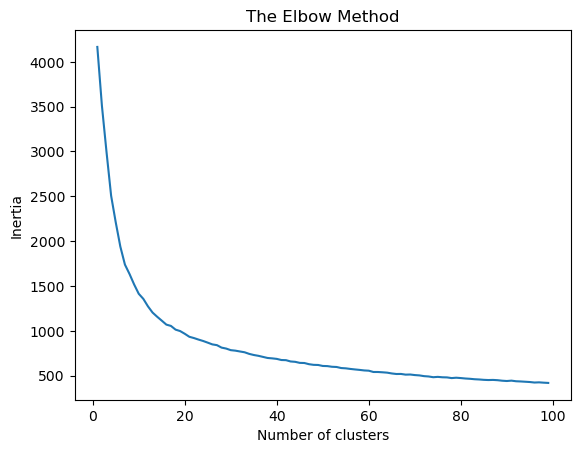

In [251]:
cs = []
clusters = 100
for i in range(1, clusters):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 1)
    kmeans.fit(df_scaled)
    cs.append(kmeans.inertia_)
plt.plot(range(1, clusters), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [255]:
kmeans = KMeans(n_clusters=10, max_iter = 1000, n_init = 10, random_state = 1)
kmeans.fit(df_scaled)
kmeans.score(df_scaled)

-1413.5038963661339

In [256]:
kmeans.inertia_

1413.5038963661334

In [257]:
silhouette_score(df_scaled, kmeans.labels_)

0.371351400508473

La puntuación de silueta en el módulo de métricas de scikit-learn es una medida de lo bien separadas que están las muestras en un modelo de agrupación. La puntuación de silueta oscila entre -1 y 1, donde una puntuación más alta indica que las muestras están mejor separadas en sus clusters asignados.

Se considera que una buena puntuación de la silueta es superior a 0,5, lo que significa que las muestras están bien separadas en los conglomerados asignados. Sin embargo, una puntuación superior a 0,7 suele considerarse muy buena, lo que indica que la solución de agrupación es sólida.

Es importante señalar que la puntuación óptima de silhouette depende del caso de uso específico y de la naturaleza de los datos. En algunos casos, una puntuación de 0,5 puede considerarse buena, mientras que en otros, una puntuación de 0,7 puede no ser suficiente. Lo mejor es experimentar con diferentes algoritmos de agrupación y evaluar su rendimiento utilizando la puntuación de silueta para determinar la mejor solución para su caso de uso específico.